<a href="https://colab.research.google.com/github/QuothTheRaven42/small_projects/blob/master/Global_Video_Games_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


In [ ]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
len(df.Platform.unique())

31

In [ ]:
df[df.Year <= 1980]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [ ]:
df.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc='sum').dropna()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,57.02,4.81,10.46,10.48,32.23,5.57,14.49,75.74,1.29,27.08,6.20,2.09
DS,115.56,47.29,7.20,137.76,77.45,84.29,38.64,126.85,8.20,132.03,31.83,15.39
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
GC,37.84,5.93,18.43,16.73,28.66,4.70,21.89,13.15,13.63,8.59,25.49,4.32
N64,29.58,0.45,22.08,11.19,36.13,3.41,40.09,3.36,19.27,10.19,32.80,10.33
PC,31.53,10.09,0.27,8.56,0.49,0.92,4.06,47.78,45.32,51.91,12.01,45.88
PS,127.05,20.97,72.68,44.90,64.21,12.08,103.19,78.30,39.31,25.33,120.97,21.67
PS2,272.76,21.16,92.60,101.14,72.51,5.90,156.28,93.50,108.57,42.66,273.41,15.15
PS3,307.88,22.90,51.70,47.85,30.33,0.60,73.95,75.30,196.04,10.79,135.56,4.94


In [ ]:
df.pivot_table(index='Publisher', values='Global_Sales', aggfunc='sum').sort_values(by='Global_Sales', ascending=False)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Ongakukan,0.01
Commseed,0.01
Takuyo,0.01


In [ ]:
df.pivot_table(index=['Platform'], values='Global_Sales', aggfunc='sum').sort_values(by='Global_Sales', ascending=False).head()

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49


In [ ]:
# Global sales drop after 2010...little to no data after 2016
df.pivot_table(index=['Year'], values='Global_Sales', aggfunc='sum').sort_values(by='Year', ascending=False)

,Global_Sales
Year,
2020.0,0.29
2017.0,0.05
2016.0,70.93
2015.0,264.44
2014.0,337.05
2013.0,368.11
2012.0,363.54
2011.0,515.99
2010.0,600.45


In [ ]:
len(set(df[df['Year'] == 2015]['Name']))

364

In [ ]:
# confirmed num of game sales reported quickly dropped off, peaking 2009-2010
len(set(df[df['Year']==2010]['Name']))

903

In [ ]:
# dropping rows after 2010
df = df[df['Year']<=2010]

In [ ]:
# pivot again without dropped data, using groupby instead of pivot table
df.groupby('Platform').agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False).head()

,Global_Sales
Platform,
PS2,1232.99
Wii,809.28
DS,777.25
PS,727.39
X360,583.70


In [ ]:
# best sales by platform genre
df.groupby(['Platform','Genre']).agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False).head()

Global_Sales
Platform Genre                
Wii      Sports         276.23
PS2      Action         272.37
         Sports         262.37
Wii      Misc           173.54
X360     Shooter        157.74

In [ ]:
# best years for sales are 2006-2010
df.groupby('Year').agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False).head()

,Global_Sales
Year,
2008.0,678.90
2009.0,667.30
2007.0,611.13
2010.0,600.45
2006.0,521.04


In [ ]:
# best selling games of all time
df_games = df.groupby('Name').agg({'Global_Sales':'sum'})
df_games.sort_values('Global_Sales', ascending=False).head()

,Global_Sales
Name,
Wii Sports,82.74
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00


In [ ]:
# make new column to find num of games per year
df_year = df.groupby('Year').agg({'Global_Sales':'sum'})
df_year.sort_values('Global_Sales', ascending=False).head()

,Global_Sales
Year,
2008.0,678.90
2009.0,667.30
2007.0,611.13
2010.0,600.45
2006.0,521.04


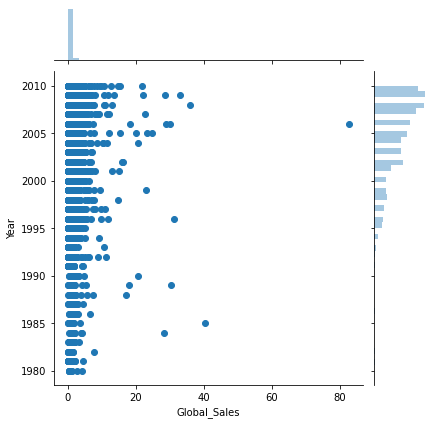

In [ ]:
# vg = sns.load_dataset(df)
sns.jointplot(x='Global_Sales', y='Year', data=df)

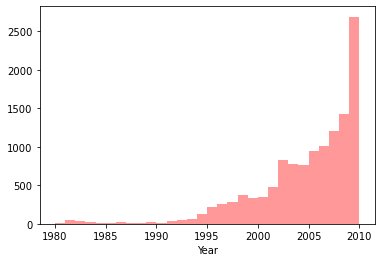

In [ ]:
sns.distplot(df['Year'], kde=False, bins=30, color='red')

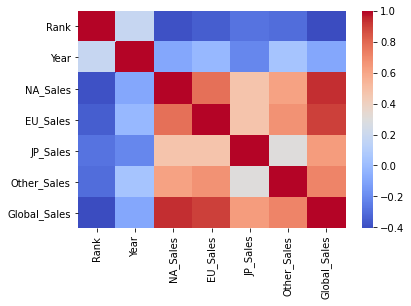

In [ ]:
# only correlations are country sales to global sales
dfc = df.corr()
sns.heatmap(dfc, cmap='coolwarm') 

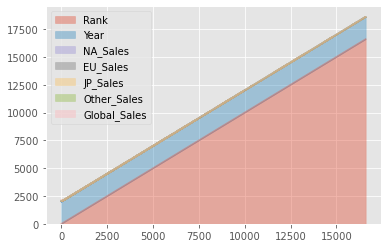

In [ ]:
plt.style.use('ggplot')
df.plot.area(alpha=0.4)
plt.show()

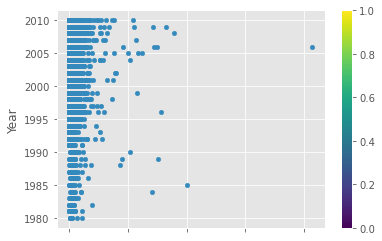

In [ ]:
df.plot.scatter(x='Global_Sales',y='Year', cmap='seismic')
plt.show()

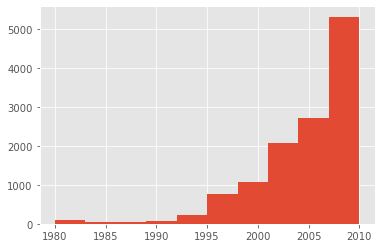

In [ ]:
df['Year'].hist()

In [ ]:
games_per_year = df.groupby('Year')['Name'].nunique()
games_per_year

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      40
1992.0      41
1993.0      59
1994.0     117
1995.0     215
1996.0     258
1997.0     282
1998.0     364
1999.0     326
2000.0     324
2001.0     428
2002.0     631
2003.0     546
2004.0     551
2005.0     659
2006.0     775
2007.0     887
2008.0    1039
2009.0    1003
2010.0     903
Name: Name, dtype: int64

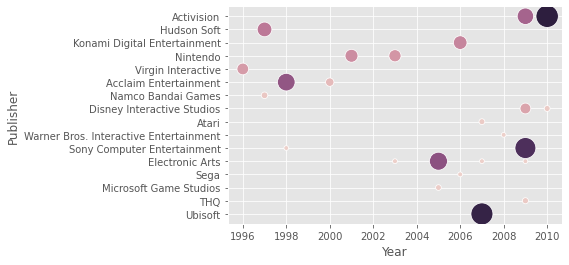

In [ ]:
ax = sns.scatterplot(x=df.Year, y=df.Publisher,
                     hue=games_per_year, size=games_per_year, sizes=(20, 400), legend=False)